In [ ]:
!pip install git+https://github.com/Navu45/image-merging.git

In [1]:
import PIL
import requests
import torch
from io import BytesIO
from diffusers import DiffusionPipeline
from diffusers.utils import make_image_grid, load_image

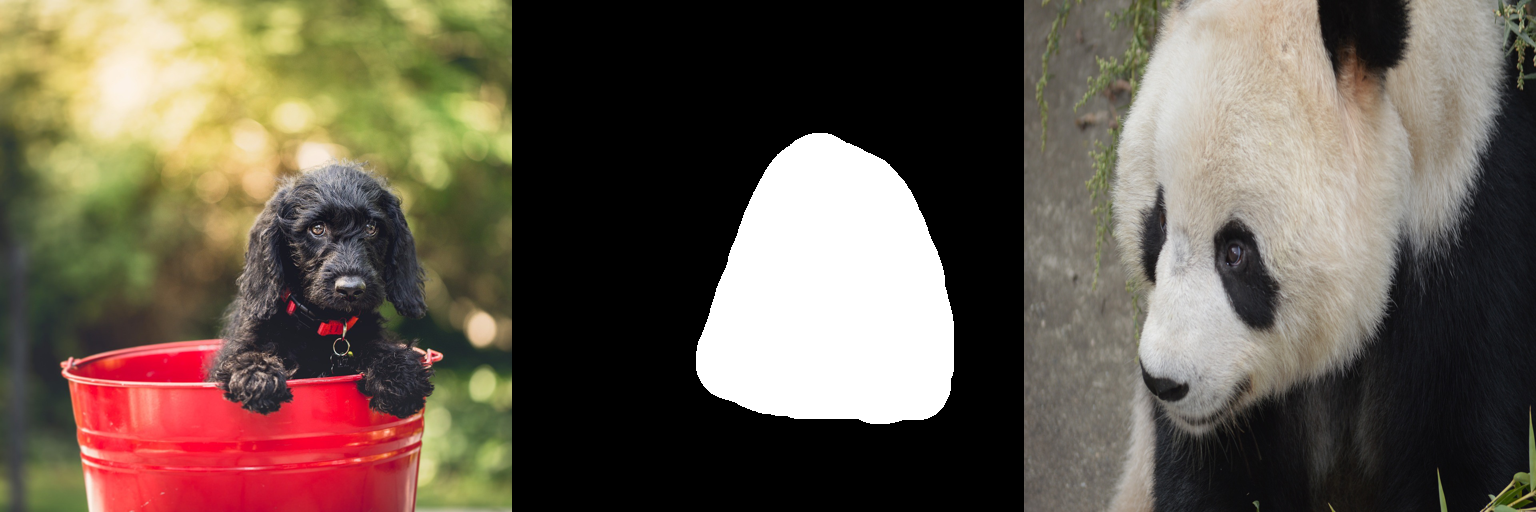

In [2]:
img_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
mask_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

init_image = load_image(img_url).resize((512, 512))
mask_image = load_image(mask_url).resize((512, 512))
example_image = load_image(example_url).resize((512, 512))

make_image_grid([init_image, mask_image, example_image], 1, 3)

In [3]:
from models.inpaint_image import StableDiffusionInpaintPipeline

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
    local_files_only=True
)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You are using a model of type clip_vision_model to instantiate a model of type clip. This is not supported for all configurations of models and can yield errors.


In [4]:
# image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]
# image

In [5]:
source_embeds = pipe.encode_image(init_image)
target_embeds = pipe.encode_image(example_image)

In [6]:
mask = pipe.generate_mask(init_image,
                          target_prompt_embeds=target_embeds,
                          source_prompt_embeds=source_embeds,
                          num_maps_per_mask=4,
                          mask_encode_strength=0.5,
                          mask_thresholding_ratio=3.0,
                          num_inference_steps=50,
                          guidance_scale=1,
                          output_type="pil")

OutOfMemoryError: CUDA out of memory. Tried to allocate 576.00 MiB (GPU 0; 6.00 GiB total capacity; 4.74 GiB already allocated; 0 bytes free; 4.89 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF